In [1]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score ,roc_auc_score ,roc_curve, auc , precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn import svm

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)

In [3]:
# Import data from the external CSV
#reading the data
from scaled_data import *
df_X,df_y = clean_data()

from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test= train_test_split(df_X,df_y  , test_size=0.25, random_state=123)



sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


# Base model

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Metrics
Accuracy: 0.8621472591631528
Precision: 0.547550432276657
Recall: 0.7739307535641547
AUC 0.8263943891277563
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2592
           1       0.55      0.77      0.64       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083

Train Classification Report
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      7830
           1       0.89      0.93      0.91      7830

    accuracy                           0.91     15660
   macro avg       0.91      0.91      0.91     15660
weighted avg       0.91      0.91      0.91     15660

score train 0.9087484035759897
score test 0.8621472591631528
Roc -Auc Curve 0.8263943891277563


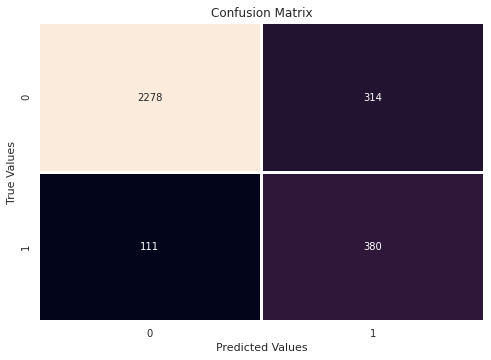

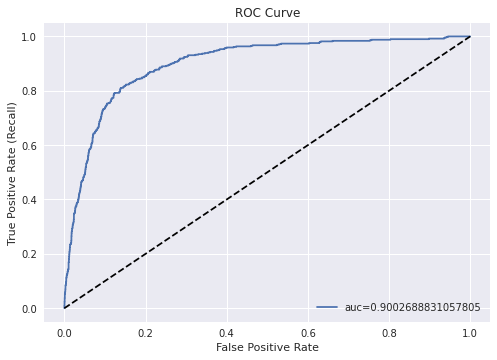

In [4]:

# base model

SVM_model2 =SVC( kernel='linear',max_iter=-1, random_state=123, tol=0.001, verbose=False,  probability=True)

SVM_model2.fit(X_train_bal, y_train_bal)

SVM_model_train_pred2= SVM_model2.predict(X_train_bal)

SVM_model_test_pred2 = SVM_model2.predict(X_test)







print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,SVM_model_test_pred2))
print("Precision:",precision_score(y_test,SVM_model_test_pred2))
print("Recall:",recall_score(y_test,SVM_model_test_pred2))
roc_auc = roc_auc_score(y_test, SVM_model_test_pred2)
print('AUC' ,roc_auc)

print('Test Classification Report')
print(classification_report(y_test,SVM_model_test_pred2))

print('Train Classification Report')
print(classification_report(y_train_bal,SVM_model_train_pred2))
print("score train",SVM_model2.score(X_train_bal, y_train_bal))
#print("score train",SVM_model.score(X_test, y_train_bal))
print("score test",SVM_model2.score(X_test, y_test))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, SVM_model_test_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)
confusion_matrix = metrics.confusion_matrix(y_test, SVM_model_test_pred2)

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()





y_pred_proba = SVM_model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()


## GridSearch

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [7]:
grid = GridSearchCV(SVC(kernel='linear',max_iter=-1),param_grid,refit=True,verbose=2,cv = 3)
grid.fit(X_train_bal, y_train_bal)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=0.1, gamma=1, total=   2.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=0.1, gamma=1, total=   3.8s
[CV] C=0.1, gamma=1 ..................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=0.1, gamma=1, total=   3.8s
[CV] C=0.1, gamma=0.1 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=0.1, gamma=0.1, total=   2.8s
[CV] C=0.1, gamma=0.1 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=0.1, gamma=0.1, total=   3.8s
[CV] C=0.1, gamma=0.1 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=0.1, gamma=0.1, total=   3.8s
[CV] C=0.1, gamma=0.01 ...............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=0.1, gamma=0.01, total=   2.8s
[CV] C=0.1, gamma=0.01 ...............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=0.1, gamma=0.01, total=   3.8s
[CV] C=0.1, gamma=0.01 ...............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=0.1, gamma=0.01, total=   3.8s
[CV] C=0.1, gamma=0.001 ..............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, gamma=0.001, total=   2.8s
[CV] C=0.1, gamma=0.001 ..............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, gamma=0.001, total=   3.8s
[CV] C=0.1, gamma=0.001 ..............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, gamma=0.001, total=   3.8s
[CV] C=1, gamma=1 ....................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................................... C=1, gamma=1, total=   2.0s
[CV] C=1, gamma=1 ....................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................................... C=1, gamma=1, total=   5.1s
[CV] C=1, gamma=1 ....................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................................... C=1, gamma=1, total=   5.0s
[CV] C=1, gamma=0.1 ..................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=1, gamma=0.1, total=   2.0s
[CV] C=1, gamma=0.1 ..................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=1, gamma=0.1, total=   5.1s
[CV] C=1, gamma=0.1 ..................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=1, gamma=0.1, total=   5.0s
[CV] C=1, gamma=0.01 .................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=1, gamma=0.01, total=   2.0s
[CV] C=1, gamma=0.01 .................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=1, gamma=0.01, total=   5.1s
[CV] C=1, gamma=0.01 .................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=1, gamma=0.01, total=   5.0s
[CV] C=1, gamma=0.001 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=1, gamma=0.001, total=   2.0s
[CV] C=1, gamma=0.001 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=1, gamma=0.001, total=   5.1s
[CV] C=1, gamma=0.001 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=1, gamma=0.001, total=   5.0s
[CV] C=10, gamma=1 ...................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... C=10, gamma=1, total=   2.2s
[CV] C=10, gamma=1 ...................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... C=10, gamma=1, total=  16.4s
[CV] C=10, gamma=1 ...................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... C=10, gamma=1, total=  14.1s
[CV] C=10, gamma=0.1 .................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=10, gamma=0.1, total=   2.2s
[CV] C=10, gamma=0.1 .................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=10, gamma=0.1, total=  16.4s
[CV] C=10, gamma=0.1 .................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=10, gamma=0.1, total=  14.1s
[CV] C=10, gamma=0.01 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=10, gamma=0.01, total=   2.2s
[CV] C=10, gamma=0.01 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=10, gamma=0.01, total=  16.4s
[CV] C=10, gamma=0.01 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=10, gamma=0.01, total=  14.1s
[CV] C=10, gamma=0.001 ...............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=10, gamma=0.001, total=   2.2s
[CV] C=10, gamma=0.001 ...............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=10, gamma=0.001, total=  16.4s
[CV] C=10, gamma=0.001 ...............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=10, gamma=0.001, total=  14.1s
[CV] C=100, gamma=1 ..................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=100, gamma=1, total=   4.8s
[CV] C=100, gamma=1 ..................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=100, gamma=1, total= 1.6min
[CV] C=100, gamma=1 ..................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=100, gamma=1, total= 1.5min
[CV] C=100, gamma=0.1 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=100, gamma=0.1, total=   4.7s
[CV] C=100, gamma=0.1 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=100, gamma=0.1, total= 1.6min
[CV] C=100, gamma=0.1 ................................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=100, gamma=0.1, total= 1.5min
[CV] C=100, gamma=0.01 ...............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=100, gamma=0.01, total=   4.7s
[CV] C=100, gamma=0.01 ...............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=100, gamma=0.01, total= 1.6min
[CV] C=100, gamma=0.01 ...............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=100, gamma=0.01, total= 1.5min
[CV] C=100, gamma=0.001 ..............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=100, gamma=0.001, total=   4.7s
[CV] C=100, gamma=0.001 ..............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=100, gamma=0.001, total= 1.6min
[CV] C=100, gamma=0.001 ..............................................


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=100, gamma=0.001, total= 1.5min


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 16.7min finished
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [8]:
print(grid.best_estimator_) 
print('Best score for training data:', grid.best_score_)
print('Best `C`:',grid.best_estimator_.C)
print('Best `gamma`:',grid.best_estimator_.gamma)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best score for training data: 0.8839080459770114
Best `C`: 0.1
Best `gamma`: 1


In [9]:
grid_predictions = grid.predict(X_test)

In [10]:
print(confusion_matrix(y_test,grid_predictions))

[[2272  320]
 [ 103  388]]


In [11]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91      2592
           1       0.55      0.79      0.65       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083



# Final model with all features

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Metrics
Accuracy: 0.8627959779435614
Precision: 0.5480225988700564
Recall: 0.790224032586558
AUC 0.8333836212315506
Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      2592
           1       0.55      0.79      0.65       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083

Train Classification Report
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7830
           1       0.89      0.92      0.91      7830

    accuracy                           0.91     15660
   macro avg       0.91      0.91      0.91     15660
weighted avg       0.91      0.91      0.91     15660

score train 0.9061941251596424
score test 0.8627959779435614
Roc -Auc Curve 0.8333836212315506


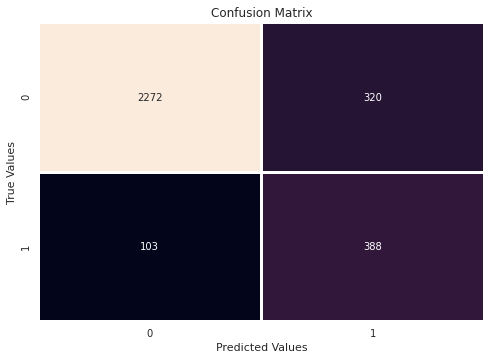

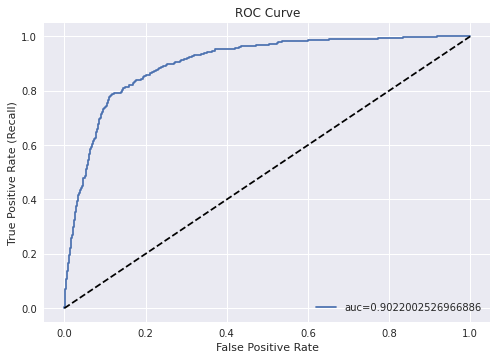

In [5]:

from sklearn.ensemble import GradientBoostingClassifier



SVM_model2 =SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVM_model2.fit(X_train_bal, y_train_bal)

SVM_model_train_pred2= SVM_model2.predict(X_train_bal)

SVM_model_test_pred2 = SVM_model2.predict(X_test)







print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,SVM_model_test_pred2))
print("Precision:",precision_score(y_test,SVM_model_test_pred2))
print("Recall:",recall_score(y_test,SVM_model_test_pred2))
roc_auc = roc_auc_score(y_test, SVM_model_test_pred2)
print('AUC' ,roc_auc)

print('Test Classification Report')
print(classification_report(y_test,SVM_model_test_pred2))

print('Train Classification Report')
print(classification_report(y_train_bal,SVM_model_train_pred2))
print("score train",SVM_model2.score(X_train_bal, y_train_bal))
#print("score train",SVM_model.score(X_test, y_train_bal))
print("score test",SVM_model2.score(X_test, y_test))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, SVM_model_test_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)
confusion_matrix = metrics.confusion_matrix(y_test, SVM_model_test_pred2)

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba = SVM_model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()








# Feature importance

Index(['OperatingSystems_dummies_5', 'OperatingSystems_dummies_1', 'Browser_dummies_3', 'Browser_dummies_6', 'OperatingSystems_dummies_4', 'OperatingSystems_dummies_2', 'OperatingSystems_dummies_3',
       'OperatingSystems_dummies_6', 'OperatingSystems_dummies_8', 'Browser_dummies_1', 'Browser_dummies_2', 'Browser_dummies_5', 'Browser_dummies_4', 'OperatingSystems_dummies_7',
       'Browser_dummies_7'],
      dtype='object')

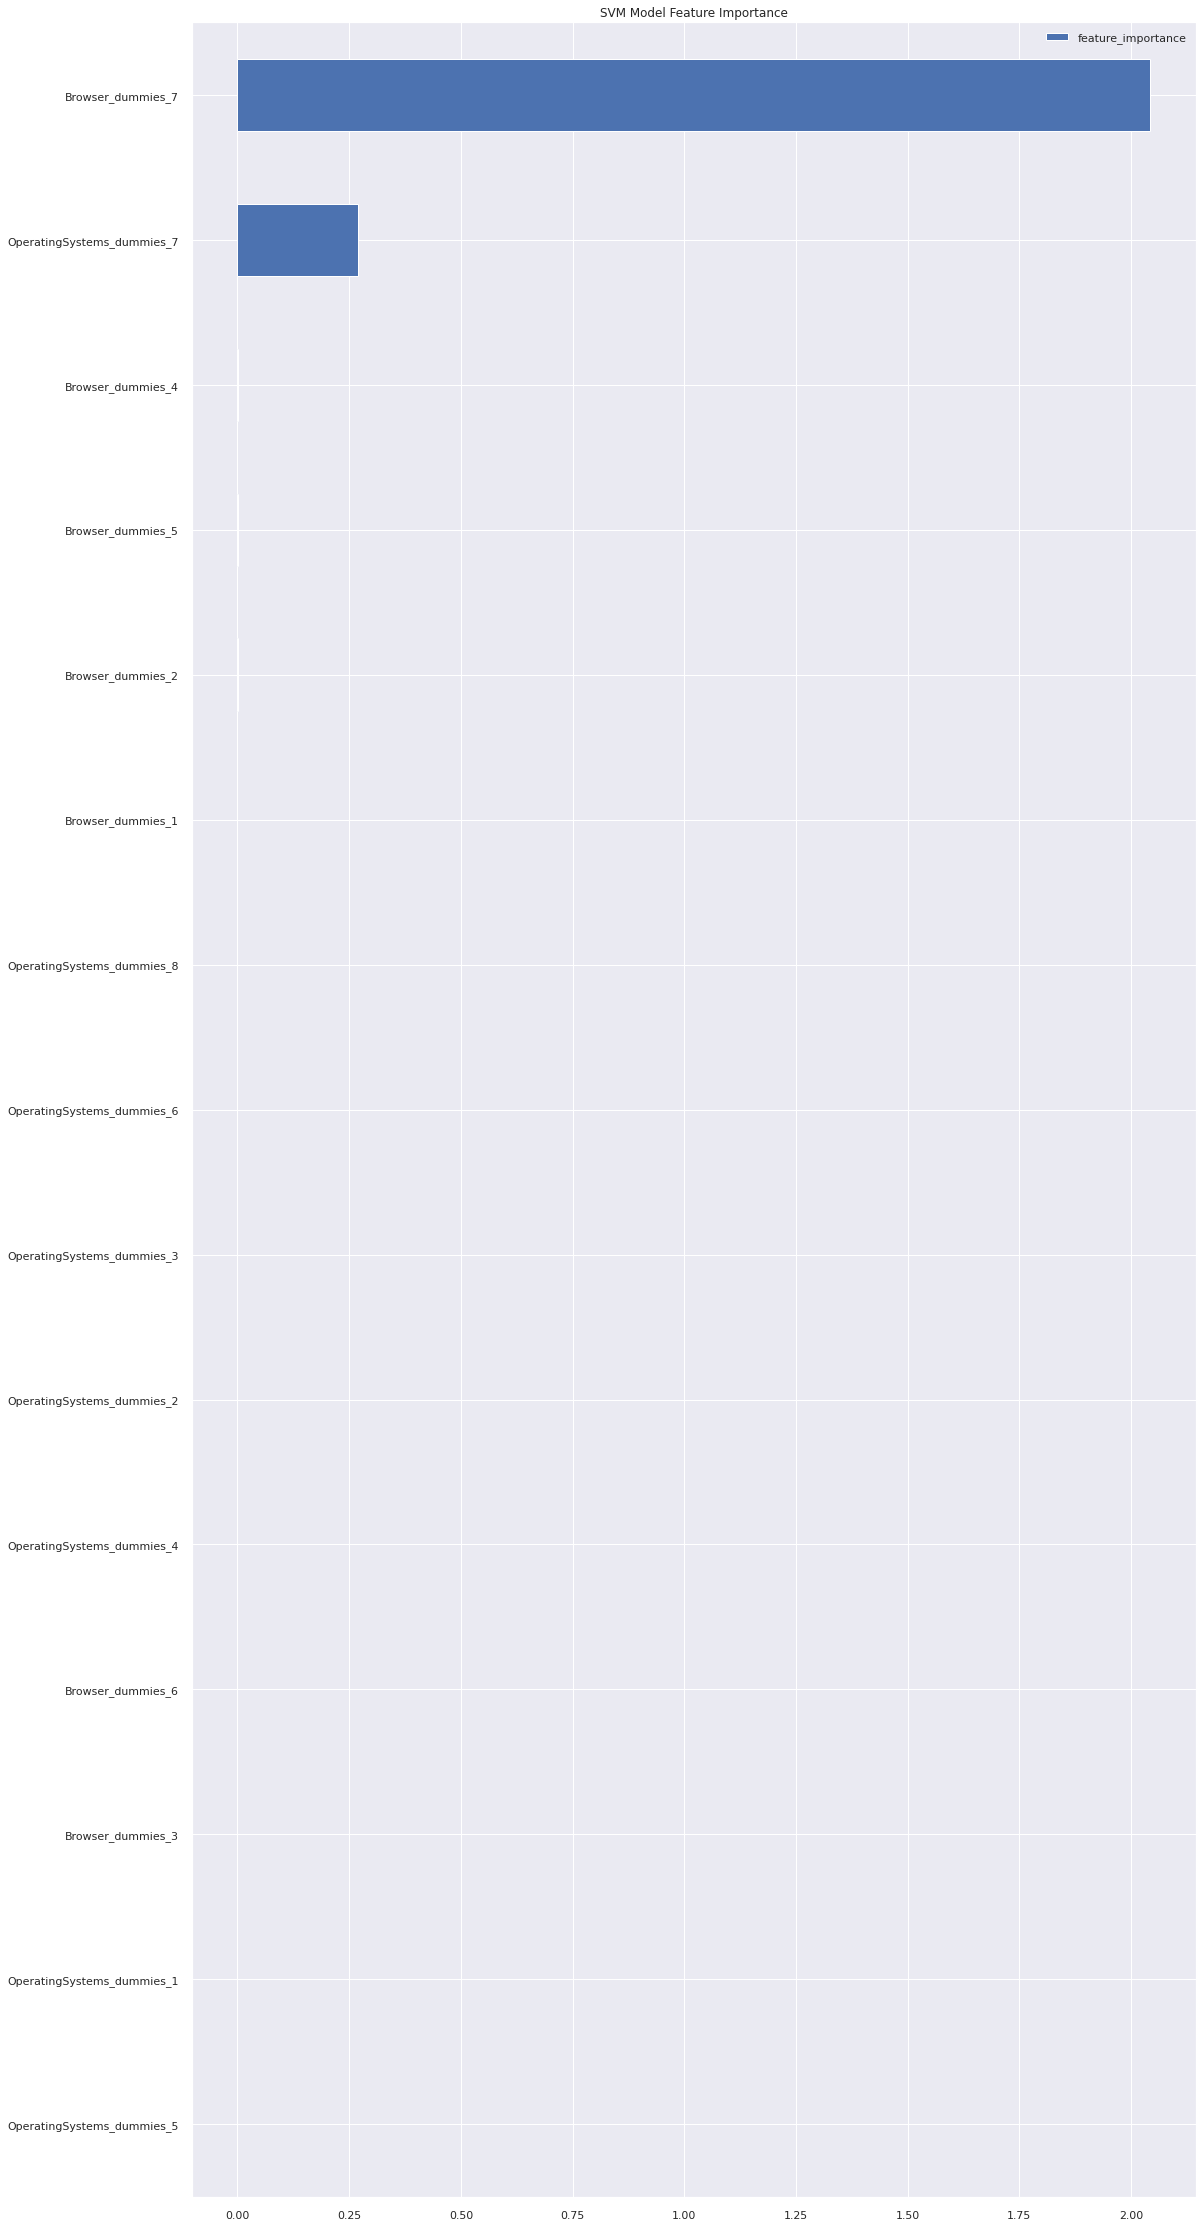

In [27]:

#https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip( df_X.columns,SVM_model2.coef_.ravel()):
    feats[feature] = importance #add the name/value pair 
sns.set()
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'feature_importance'})
importances.sort_values(by='feature_importance').plot(kind='barh', rot=0 , figsize=(18,40) ,title ='SVM Model Feature Importance')

importances.sort_values(by='feature_importance').tail(15).index

In [ ]:
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(SVM_model2,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(SVM_model2,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)


print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

# Final model with feature selection

In [6]:
best_X = ['Browser_dummies_13', 'Browser_dummies_11', 'OperatingSystems_dummies_5', 'Browser_dummies_12', 'OperatingSystems_dummies_7', 'TrafficType_dummies_17', 'TrafficType_dummies_16',
       'TrafficType_dummies_12', 'Browser_dummies_9', 'average_BounceRates/ExitRates_skew_s', 'average_administrative_duration_skew_s', 'Weekend_binary', 'average_informational_duration_skew_s',
       'average_ProductRelated_duration_skew_s', 'PageValues_skew_s']




from sklearn.ensemble import GradientBoostingClassifier


SVM_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
XSVM = SVM_Xdata[best_X].values


#getting the values of our y:
y_SVM = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(XSVM, y_SVM , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


SVM_model2 =SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVM_model2.fit(X_train_bal, y_train_bal)

SVM_model_train_pred2= SVM_model2.predict(X_train_bal)

SVM_model_test_pred2 = SVM_model2.predict(X_test)







print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,SVM_model_test_pred2))
print("Precision:",precision_score(y_test,SVM_model_test_pred2))
print("Recall:",recall_score(y_test,SVM_model_test_pred2))
roc_auc = roc_auc_score(y_test, SVM_model_test_pred2)
print('AUC' ,roc_auc)

print('Test Classification Report')
print(classification_report(y_test,SVM_model_test_pred2))

print('Train Classification Report')
print(classification_report(y_train_bal,SVM_model_train_pred2))
print("score train",SVM_model2.score(X_train_bal, y_train_bal))
#print("score train",SVM_model.score(X_test, y_train_bal))
print("score test",SVM_model2.score(X_test, y_test))








Test Metrics
Accuracy: 0.8627959779435614
Precision: 0.5480225988700564
Recall: 0.790224032586558
AUC 0.8333836212315506
Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      2592
           1       0.55      0.79      0.65       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083

Train Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7830
           1       0.88      0.81      0.84      7830

    accuracy                           0.85     15660
   macro avg       0.85      0.85      0.85     15660
weighted avg       0.85      0.85      0.85     15660

score train 0.8488505747126437
score test 0.8627959779435614


Roc -Auc Curve 0.8333836212315506


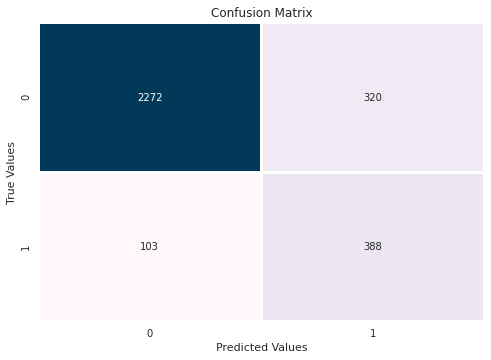

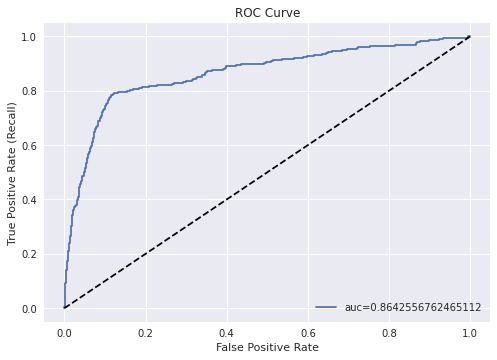

In [7]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, SVM_model_test_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)
confusion_matrix = metrics.confusion_matrix(y_test, SVM_model_test_pred2)

sns.heatmap(confusion_matrix,annot=True,cmap = "PuBu"  ,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba = SVM_model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()

In [31]:
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(SVM_model2,X_train_bal, y_train_bal, scoring='f1', cv=5)
roc_auc_cv = cross_val_score(SVM_model2,X_train_bal, y_train_bal, scoring='roc_auc', cv=5)


print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

model bias (f1-score): 0.8410712625886548
model variance (f1-score): 0.005085963378682648
model bias (ROC/AUC): 0.8740889577206572
model variance (ROC/AUC): 0.010697330875215802
